In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        #x = self.fc3(x)
        return x

# Load CIFAR-10 dataset for color images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Initialize LeNet-5 model for color images
net_color = LeNet5Color()

# Define loss function and optimizer
criterion_color = nn.CrossEntropyLoss()
optimizer_color = optim.Adam(net_color.parameters(), lr=0.001)

# Lists to store training/test accuracy and loss for color images
train_accuracy_list_color = []
test_accuracy_list_color = []
train_loss_list_color = []
test_loss_list_color = []

# Train the model for color images
for epoch in range(10):  # Change the number of epochs as needed
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_color.zero_grad()
        outputs = net_color(inputs)
        loss = criterion_color(outputs, labels)
        loss.backward()
        optimizer_color.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch+1}/{10}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Save training accuracy and loss
    train_accuracy_list_color.append(train_accuracy)
    train_loss_list_color.append(train_loss)

    # Test the model for color images
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net_color(inputs)
            loss = criterion_color(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_loss /= len(testloader)
    print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

    # Save test accuracy and loss
    test_accuracy_list_color.append(test_accuracy)
    test_loss_list_color.append(test_loss)



Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Training Loss: 1.4943, Training Accuracy: 0.4548
Testing Loss: 1.3086, Testing Accuracy: 0.5342
Epoch 2/10, Training Loss: 1.2331, Training Accuracy: 0.5638
Testing Loss: 1.2308, Testing Accuracy: 0.5651
Epoch 3/10, Training Loss: 1.1381, Training Accuracy: 0.5976
Testing Loss: 1.2191, Testing Accuracy: 0.5786
Epoch 4/10, Training Loss: 1.0735, Training Accuracy: 0.6223
Testing Loss: 1.1399, Testing Accuracy: 0.6040
Epoch 5/10, Training Loss: 1.0266, Training Accuracy: 0.6377
Testing Loss: 1.1616, Testing Accuracy: 0.6065
Epoch 6/10, Training Loss: 0.9929, Training Accuracy: 0.6493
Testing Loss: 1.1264, Testing Accuracy: 0.6104
Epoch 7/10, Training Loss: 0.9581, Training Accuracy: 0.6631
Testing Loss: 1.1844, Testing Accuracy: 0.6037
Epoch 8/10, Training Loss: 0.9339, Training Accuracy: 0.6697
Testing Loss: 1.1471, Testing Accuracy: 0.6098
Epoch 9/10, Training Loss: 0.9069, Training Accuracy: 0.6790

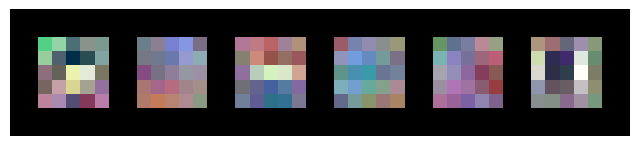

In [2]:

import torchvision.utils as vutils

# ... (previous code)

# Show the first layer filters for color images using make_grid
filter_weights = net_color.conv1.weight.data.clone()
filter_weights -= filter_weights.min()
filter_weights /= filter_weights.max()

grid = vutils.make_grid(filter_weights, nrow=6, normalize=True)
plt.figure(figsize=(8, 8))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()

In [3]:

# Save intermediate activations from the first layer for color images
dataiter = iter(trainloader)
images, labels = dataiter.next()
first_layer_activations_color = net_color.conv1(images)
np.save('first_layer_activations_train4.npy', first_layer_activations_color.detach().numpy())

dataiter = iter(testloader)
images, labels = dataiter.next()
first_layer_activations_color = net_color.conv1(images)
np.save('first_layer_activations_test4.npy', first_layer_activations_color.detach().numpy())

# Save training and test accuracy and loss for color images
np.save('train_accuracy_color4.npy', np.array(train_accuracy_list_color))
np.save('test_accuracy_color4.npy', np.array(test_accuracy_list_color))
np.save('train_loss_color4.npy', np.array(train_loss_list_color))
np.save('test_loss_color4.npy', np.array(test_loss_list_color))

print('Finished Training for color images')

Finished Training for color images


In [4]:
torch.save(net_color.state_dict(), 'lenet4_color_model.pth')
